In [77]:
    import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image

In [78]:
def plot(im, pts):

    fig,ax = plt.subplots(1)
    ax.imshow(im)
    ptss = pts.reshape(-1, 68, 2)
    for pts in ptss:
        print(pts.shape)
        xmin, ymin = pts.min(axis=0)
        xmax, ymax = pts.max(axis=0)

        rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

(68, 2)


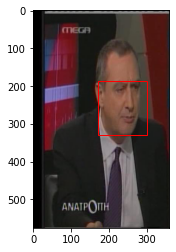

In [79]:
image_path = '../data/CONFER/FOLD_1/20120604_seq9/20120604_seq9_01_01/20120604_seq9_01_01_00001.jpg'
pts_path = '../data/CONFER/FOLD_1/20120604_seq9/20120604_seq9_01_01/20120604_seq9_01_01_00001.pts'

im = Image.open(image_path)
pts = np.loadtxt(pts_path, comments=("version:", "n_points:", "{", "}"))

plot(im, pts)

(68, 2)


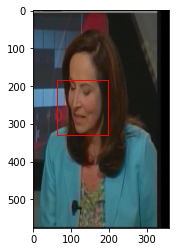

In [80]:
image_path = '../data/CONFER/FOLD_1/20120604_seq9/20120604_seq9_01_02/20120604_seq9_01_02_00001.jpg'
pts_path = '../data/CONFER/FOLD_1/20120604_seq9/20120604_seq9_01_02/20120604_seq9_01_02_00001.pts'

im = Image.open(image_path)
pts = np.loadtxt(pts_path, comments=("version:", "n_points:", "{", "}"))

plot(im, pts)

(68, 2)
(68, 2)


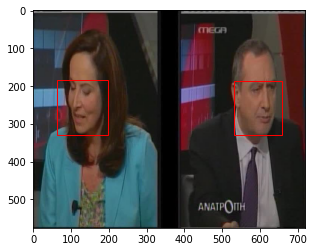

In [81]:
image_path = '../data/CONFER/FOLD_1/20120604_seq9/stitched/000001.jpg'
pts_path = '../data/CONFER/FOLD_1/20120604_seq9/stitched/000001.pts'

im = Image.open(image_path)
pts = np.loadtxt(pts_path, comments=("version:", "n_points:", "{", "}"))

plot(im, pts)

(68, 2)


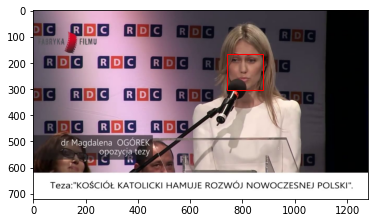

In [83]:
image_path = '../data/300VW/001/framesvid/output000001.png'
pts_path = '../data/300VW/001/annot/000001.pts'

im = Image.open(image_path)
pts = np.loadtxt(pts_path, comments=("version:", "n_points:", "{", "}"))

plot(im, pts)

In [188]:
import torch
from torch.utils.data import Dataset, ConcatDataset, DataLoader
from torch.utils.data.sampler import BatchSampler, SequentialSampler, Sampler
from functools import partial
    
class MyBatchSampler(BatchSampler):
    def __init__(self, sampler, batch_size: int, drop_last: bool, chunk_lens: list) -> None:
        super().__init__(sampler, batch_size, drop_last)
        self.chunk_lens = chunk_lens
        
    def __iter__(self):        
        offset = 0
        for chunk_len in chunk_lens:
            batch = []
            for idx in range(offset, offset+chunk_len):#self.sampler: # range(37)
                batch.append(idx)
                if len(batch) == self.batch_size:
                    yield batch
                    batch = []
            if len(batch) > 0 and not self.drop_last:
                yield batch
            offset += chunk_len

    def __len__(self):
        if self.drop_last:
            l = sum([chunk_len//self.batch_size for chunk_len in chunk_lens])
            return l  # type: ignore
        else:
            return sum([(chunk_len + self.batch_size - 1)//self.batch_size for chunk_len in chunk_lens]) # type: ignore